#                     Energy Prediction

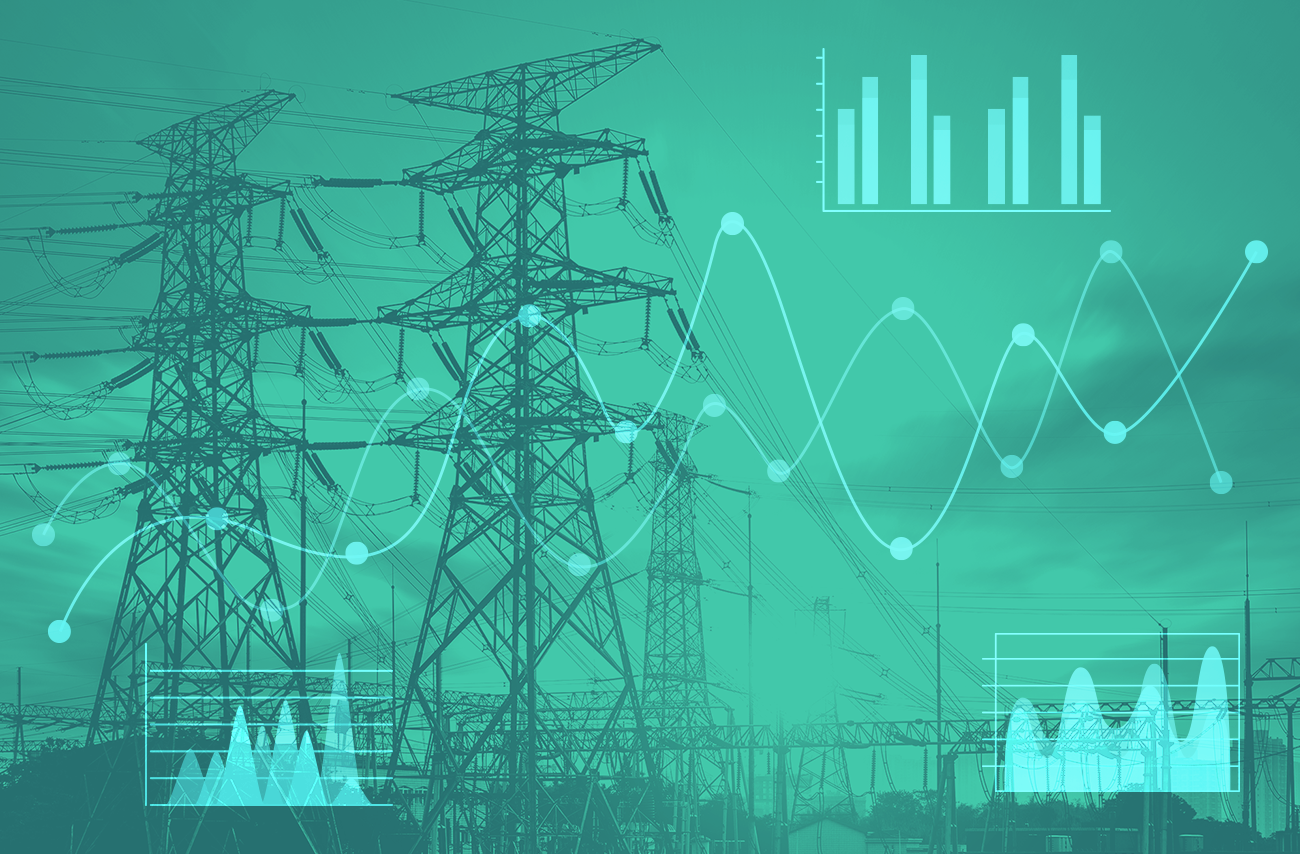

### Thedataset
Appliances Energy Prediction Data is the dataset. For almost 4.5 months, the data set is at 10 minutes. A ZigBee wireless sensor network was used to keep track of the indoor temperature and humidity levels. Around 3.3 minutes later, each wireless node sent the temperature and humidity readings. The wireless data was then averaged across 10 minute intervals. Every 10 minutes, the energy data was recorded using m-bus energy meters. The experimental data sets were combined with the weather data from the closest airport weather station (Chievres Airport, Belgium), which was collected from a public data set from Reliable Prognosis (rp5.ru), utilizing the date and time column. To test the regression models and exclude non-predictive features, two random variables were added to the data set (parameters).

In [64]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("ggplot")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import (LinearRegression,Ridge,Lasso)
from sklearn.metrics import (r2_score,mean_absolute_error,mean_squared_error)

In [65]:
#importing or loading thedata
energy = pd.read_csv('energydata_complete.csv')



In [66]:
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [67]:
energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [47]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### There are no null values in the dataset and therefore no much cleaning





In [69]:
scaler1 = MinMaxScaler()
normal_df = pd.DataFrame(scaler1.fit_transform(energy.drop(columns=['date', 'lights'])), 
                             columns=energy.drop(columns=['date', 'lights']).columns)
ft_df = normal_df.drop(columns=['Appliances'])
energy_tgt = normal_df.Appliances
X_train, X_test, y_train, y_test = train_test_split(features_df, energy_target, test_size=.3, random_state=42)


In [70]:
lr = LinearRegression()
lr.fit(X_train[['T2']], X_train.T6)
T6_predict = lr.predict(X_test[['T2']])
print(f'r^2 score: {round(r2_score(X_test.T6, T6_predict), 2)}')

r^2 score: 0.64


In [71]:
print(f'MAE: {round(mean_absolute_error(X_test.T6, T6_predict), 2)}')

MAE: 0.08


In [72]:
print(f' The RSS: {round(np.sum(np.square(X_test.T6 - T6_predict)), 2)}')

 The RSS: 66.12


In [73]:
print(f'RMSE: {round(np.sqrt(mean_squared_error(X_test.T6, T6_predict)), 3)}')


RMSE: 0.106


In [74]:
energy.drop(columns=['date', 'lights']).max().sort_values()

Windspeed        14.000000
Tdewpoint        15.500000
T9               24.500000
T5               25.795000
T7               26.000000
T_out            26.100000
T4               26.200000
T1               26.260000
T8               27.230000
T6               28.290000
T3               29.236000
T2               29.856667
rv1              49.996530
rv2              49.996530
RH_3             50.163333
RH_4             51.090000
RH_7             51.400000
RH_9             53.326667
RH_2             56.026667
RH_8             58.780000
RH_1             63.360000
Visibility       66.000000
RH_5             96.321667
RH_6             99.900000
RH_out          100.000000
Press_mm_hg     772.300000
Appliances     1080.000000
dtype: float64

In [75]:
energy.drop(columns=['date', 'lights']).min().sort_values()

Tdewpoint       -6.600000
T6              -6.065000
T_out           -5.000000
Windspeed        0.000000
rv2              0.005322
rv1              0.005322
Visibility       1.000000
RH_6             1.000000
Appliances      10.000000
T9              14.890000
T4              15.100000
T5              15.330000
T7              15.390000
T2              16.100000
T8              16.306667
T1              16.790000
T3              17.200000
RH_2            20.463333
RH_7            23.200000
RH_out          24.000000
RH_1            27.023333
RH_4            27.660000
RH_3            28.766667
RH_9            29.166667
RH_8            29.600000
RH_5            29.815000
Press_mm_hg    729.300000
dtype: float64

In [76]:
def weights(model, ft, col):
    wgts = pd.Series(model.coef_, ft.columns).sort_values()
    wgts_df = pd.DataFrame(wgts).reset_index()
    wgts_df.columns = ['Features', col]
    wgts_df[col].round(3)
    return wgts_df

In [77]:
ridge = Ridge(alpha=0.4)
ridge.fit(X_train, y_train)

Ridge(alpha=0.4)

In [78]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)


Lasso(alpha=0.001)

In [79]:
mdl = LinearRegression()
mdl.fit(X_train, y_train)


LinearRegression()

In [80]:
linear_wgt = get_weights_df(mdl, X_train, 'Linear_Wgt')
ridge_wgt = get_weights_df(ridge_reg, X_train, 'Ridge_Wgt')
lasso_wgt = get_weights_df(lasso_reg, X_train, 'Lasso_Wgt')

final_wgt = pd.merge(linear_wgt,ridge_wgt, on='Features')
final_wgt = pd.merge(final_wgt, lasso_wgt, on='Features')


In [81]:
final_wgt.sort_values("Linear_Wgt", ascending=False)


,Features,Linear_Wgt,Ridge_Wgt,Lasso_Wgt
25,RH_1,0.553547,0.519525,0.017880
24,T3,0.290627,0.288087,0.000000
23,T6,0.236425,0.217292,0.000000
22,Tdewpoint,0.117758,0.083128,0.000000
21,T8,0.101995,0.101028,0.000000
20,RH_3,0.096048,0.095135,0.000000
19,RH_6,0.038049,0.035519,-0.000000
18,Windspeed,0.029183,0.030268,0.002912
17,T4,0.028981,0.027384,-0.000000
16,RH_4,0.026386,0.024579,0.000000


In [82]:
y_pred_linear = mdl.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)


In [83]:
print(f'RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), 3)}')


RMSE: 0.088


In [63]:
print(f'RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred_lasso)), 3)}')


RMSE: 0.094
